In [1]:
import sys
import os



import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
slow_lamdas=np.logspace(-10,-4,200)
between_slow_lamdas=np.linspace(-10,-4,200)

In [7]:
with open('//scratch/tmp/180/skoove/experiment250_static_weighted_heat/clusters_sam_slow', 'rb') as f:
    multi_res_static_weighted_heat_sam = pickle.load(f)
    
avg_csize_forw_static_weighted_heat_sam = [np.mean([len(c) for c in \
                   multi_res_static_weighted_heat_sam[lamda] if len(c)>1]) for lamda in slow_lamdas]

NVI_forw_static_weighted_heat_sam = [avg_norm_var_information(multi_res_static_weighted_heat_sam[lamda]) for lamda in slow_lamdas]

with open('//scratch/tmp/180/skoove/experiment250_3scales_static_weighted_heat/clusters_sam_slow', 'rb') as f:
    multi_res_static_weighted_heat_sam = pickle.load(f)
    
avg_csize_forw_static_weighted_heat_sam_3scales = [np.mean([len(c) for c in \
                   multi_res_static_weighted_heat_sam[lamda] if len(c)>1]) for lamda in slow_lamdas]

NVI_forw_static_weighted_heat_sam_3scales = [avg_norm_var_information(multi_res_static_weighted_heat_sam[lamda]) for lamda in slow_lamdas]

with open('//scratch/tmp/180/skoove/experiment250_2scales_static_weighted_heat/clusters_sam_slow', 'rb') as f:
    multi_res_static_weighted_heat_sam = pickle.load(f)
    
avg_csize_forw_static_weighted_heat_sam_2scales = [np.mean([len(c) for c in \
                   multi_res_static_weighted_heat_sam[lamda] if len(c)>1]) for lamda in slow_lamdas]

NVI_forw_static_weighted_heat_sam_2scales = [avg_norm_var_information(multi_res_static_weighted_heat_sam[lamda]) for lamda in slow_lamdas]

KeyError: 9.999999999999999e-11

In [9]:
def derivative(v1, v2):
    assert len(v1) == len(v2), "Error: in order to compute the numerical derivative, the two varibales need to have the same lenght."
    derivative = []
    for i, vi in enumerate(v1[1:]):
        m1 =(vi - v1[i-1])/(v2[i]-v2[i-1])
        m2 =(v1[i+1] - vi)/(v2[i+1]-v2[i])
        derivative.append((m1+m2)/2)
    return derivative

In [5]:
vNSsam3scales13

[0.9971699859650379,
 0.9971695166286351,
 0.9971695166286351,
 0.9971683574519974,
 0.9971676451408785,
 0.9971668265284175,
 0.9971658857345302,
 (0.9971648045031478+5.504916809585718e-19j),
 0.9971635618458824,
 0.9971621336320837,
 0.997160492117137,
 0.9971586053996869,
 0.9971564367970219,
 0.9971539441261585,
 0.9971510788763571,
 0.9971477852565531,
 0.9971439990986156,
 (0.9971396465945657-1.9606894024769057e-18j),
 0.9971346428423243,
 0.9971288901708134,
 0.9971222762106401,
 0.9971146716714225,
 (0.9971059277807794+1.221259429831068e-18j),
 0.9970958733330796,
 0.99708431128796,
 (0.9970710148493935-2.300584587354628e-18j),
 0.9970557229452819,
 0.9970381350152374,
 0.9970179049998141,
 0.9969946344079613,
 0.9969678643204442,
 0.9969370661649131,
 0.9969016310730819,
 0.9968608576013586,
 0.9968139375629087,
 0.9967599396808092,
 0.9966977907284038,
 (0.9966262537730498-1.8797651313781123e-18j),
 (0.9965439030831957-2.803921351187775e-18j),
 0.9964490951949468,
 0.99633993

In [3]:
vNSsam= []
for i, lamda in enumerate(slow_lamdas):
    with open(f'/scratch/tmp/180/skoove/experiment250_static_weighted_heat/vNSsam_slow/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)
        vNSsam.append(S)

vNSsam3scales= []
for i, lamda in enumerate(slow_lamdas):
    with open(f'/scratch/tmp/180/skoove/experiment250_3scales_static_weighted_heat/vNSsam_slow/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)
        vNSsam3scales.append(S)

vNSsam3scales13 = []
for i, lamda in enumerate(slow_lamdas, ):
    try:
        with open(f'/scratch/tmp/180/skoove/experiment250_3scales13_static_weighted_heat/vNSsam_slow/vNS{lamda:.11f}', 'rb') as f:
            S = pickle.load(f)
        vNSsam3scales13.append(S)
    except IOError:
        vNSsam3scales13.append(vNSsam3scales13[-1])

vNSsam3scales23 = []
for i, lamda in enumerate(slow_lamdas, ):
    try:
        with open(f'/scratch/tmp/180/skoove/experiment250_3scales23_static_weighted_heat/vNSsam_slow/vNS{lamda:.11f}', 'rb') as f:
            S = pickle.load(f)
        vNSsam3scales23.append(S)
    except IOError:
        vNSsam3scales23.append(vNSsam3scales23[-1])

vNSsam2scales= []
for i, lamda in enumerate(slow_lamdas):
    with open(f'/scratch/tmp/180/skoove/experiment250_2scales_static_weighted_heat/vNSsam_slow/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)
        vNSsam2scales.append(S)


In [42]:
v1 = vNSsam
w1 = vNSsam3scales
q1 = vNSsam3scales13
r1 = vNSsam3scales23
z1 = vNSsam2scales
v2 = between_slow_lamdas
dssam_dt = derivative(v1, v2)
dssam3scales_dt = derivative(w1, v2)
dssam3scales13_dt = derivative(q1, v2)
dssam3scales23_dt = derivative(r1, v2)
dssam2scales_dt = derivative(z1,v2)

In [ ]:
# fig, (ax1,ax2) = plt.subplots(2,1, sharex=False)

# # ax1.plot(slow_lamdas[1:151], NVI_forw_static_weighted_heat[0:150] / max(NVI_forw_static_weighted_heat), 'black', label='static norm NVI: Integral')
# ax1.plot(slow_lamdas[1:151], NVI_forw_static_weighted_heat_sam [0:150] / max(NVI_forw_static_weighted_heat_sam) , 'grey', label='static norm NVI: sam')
# ax1.plot(slow_lamdas[1:151], (ds_dt / min(ds_dt)) [0:150] , 'y--', label=' norm static dvNS/dt, t = net.times[-2]')
# ax1.plot(slow_lamdas[1:151], (dssam_dt / min(dssam_dt)) [0:150], 'm--', label=' norm static dvNSsam/dt, t = net.times[-2]')
# ax1.set_xscale('log')


# ax1.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
# ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

# #ax2.plot(lamdas, NVI_forw_heat / max(NVI_forw_heat), 'grey', label='norm NVI')
# #ax2.plot(lamdas[1:], ds7_dt / min(ds7_dt), 'y', label=' norm dvNS/dt, t = net.times[-2]')
# ax2.plot(slow_lamdas, avg_csize_forw_static_weighted_heat_sam, '-', label='edge-centric: sam')
# ax2.set_xscale('log')

# # ax2.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
# ax2.set_ylabel('Avg. no. clusters')
# ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


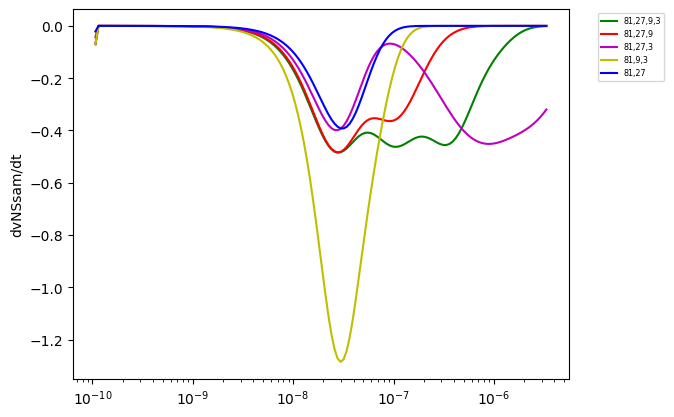

In [43]:
plt.plot(slow_lamdas[1:151], (dssam_dt) [0:150], 'g', label='81,27,9,3')
plt.plot(slow_lamdas[1:151], (dssam3scales_dt) [0:150], 'r', label='81,27,9')
plt.plot(slow_lamdas[1:151], (dssam3scales13_dt) [0:150], 'm', label='81,27,3')
plt.plot(slow_lamdas[1:151], (dssam3scales23_dt) [0:150], 'y', label='81,9,3')
plt.plot(slow_lamdas[1:151], (dssam2scales_dt) [0:150], 'b', label='81,27')
plt.xscale('log')


plt.ylabel('dvNSsam/dt')
plt.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))



In [44]:
net = ContTempNetwork.load('fig3_network250_3scales23_heat')

#Generating Networks

static_net_adj = net.compute_static_adjacency_matrix()

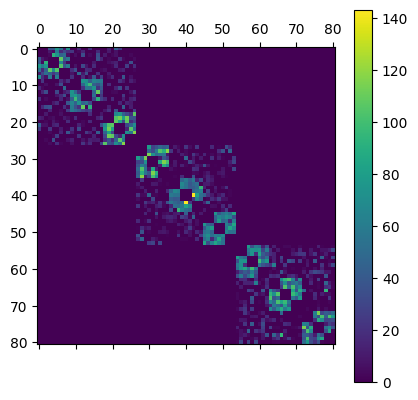

In [47]:
plt.matshow(static_net_adj.toarray())
plt.colorbar()